In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)


In [2]:
DATA_PATH = "../data/raw/data.csv"
df = pd.read_csv(DATA_PATH)
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [3]:
print("Rows, Columns:", df.shape)
display(df.dtypes)

# Key uniqueness checks
print("TransactionId unique:", df["TransactionId"].is_unique)
print("CustomerId nunique:", df["CustomerId"].nunique())
print("AccountId nunique:", df["AccountId"].nunique())


Rows, Columns: (95662, 16)


TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

TransactionId unique: True
CustomerId nunique: 3742
AccountId nunique: 3633


In [4]:
missing = df.isna().mean().sort_values(ascending=False)
missing = missing[missing > 0]
missing.to_frame("missing_ratio")


,missing_ratio


In [5]:
df.describe(include=[np.number]).T


,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


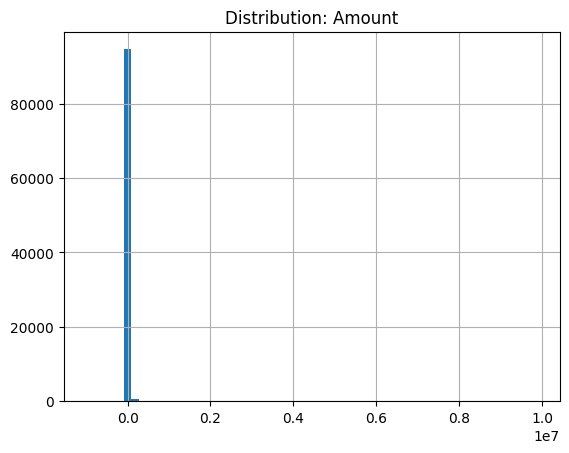

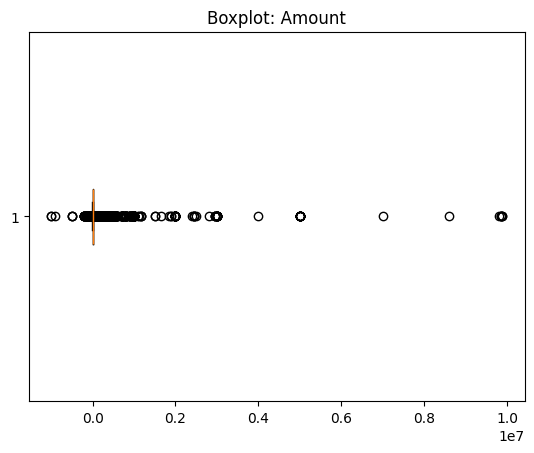

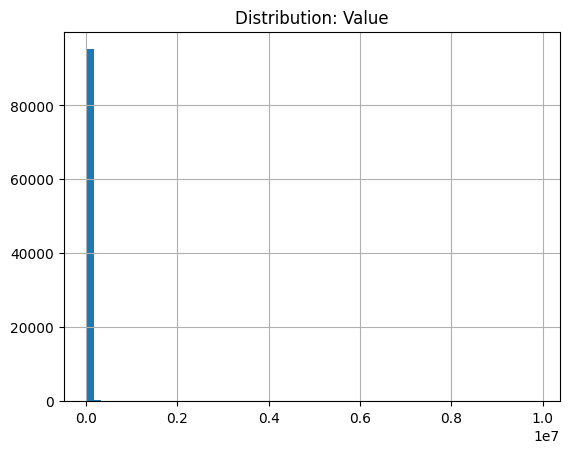

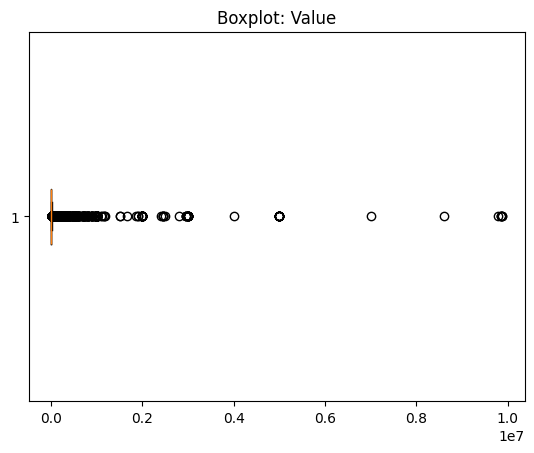

In [6]:
for c in ["Amount", "Value"]:
    if c in df.columns:
        df[c].hist(bins=60)
        plt.title(f"Distribution: {c}")
        plt.show()

        plt.boxplot(df[c].dropna(), vert=False)
        plt.title(f"Boxplot: {c}")
        plt.show()


In [7]:
for c in ["ProductCategory", "ChannelId", "ProviderId", "CurrencyCode", "PricingStrategy"]:
    if c in df.columns:
        display(df[c].value_counts(dropna=False).head(15).to_frame("count"))


,count
ProductCategory,
financial_services,45405
airtime,45027
utility_bill,1920
data_bundles,1613
tv,1279
ticket,216
movies,175
transport,25
other,2


,count
ChannelId,
ChannelId_3,56935
ChannelId_2,37141
ChannelId_5,1048
ChannelId_1,538


,count
ProviderId,
ProviderId_4,38189
ProviderId_6,34186
ProviderId_5,14542
ProviderId_1,5643
ProviderId_3,3084
ProviderId_2,18


,count
CurrencyCode,
UGX,95662


,count
PricingStrategy,
2,79848
4,13562
1,1867
0,385


In [11]:
df["TransactionStartTime"] = pd.to_datetime(df["TransactionStartTime"], errors="coerce")

df["tx_hour"] = df["TransactionStartTime"].dt.hour
df["tx_dayofweek"] = df["TransactionStartTime"].dt.day_name()
df["tx_month"] = df["TransactionStartTime"].dt.strftime("%Y-%m")

# df["tx_month"] = df["TransactionStartTime"].dt.to_period("M").astype(str)

display(df["tx_hour"].value_counts().sort_index().to_frame("count"))
display(df["tx_dayofweek"].value_counts().to_frame("count"))
display(df["tx_month"].value_counts().head(12).to_frame("count"))


,count
tx_hour,
0,168
1,176
2,289
3,714
4,2329
5,4161
6,5325
7,5723
8,5639


,count
tx_dayofweek,
Friday,27716
Tuesday,15049
Monday,11837
Thursday,11039
Wednesday,10232
Saturday,10103
Sunday,9686


,count
tx_month,
2018-12,35635
2019-01,31783
2019-02,15772
2018-11,12472


In [12]:
corr = df.select_dtypes(include=[np.number]).corr()
corr


,CountryCode,Amount,Value,PricingStrategy,FraudResult,tx_hour
CountryCode,NaN,NaN,NaN,NaN,NaN,NaN
Amount,NaN,1.000000,0.989692,-0.061931,0.557370,-0.001611
Value,NaN,0.989692,1.000000,-0.017020,0.566739,0.000474
PricingStrategy,NaN,-0.061931,-0.017020,1.000000,-0.033821,0.007423
FraudResult,NaN,0.557370,0.566739,-0.033821,1.000000,0.008295
tx_hour,NaN,-0.001611,0.000474,0.007423,0.008295,1.000000


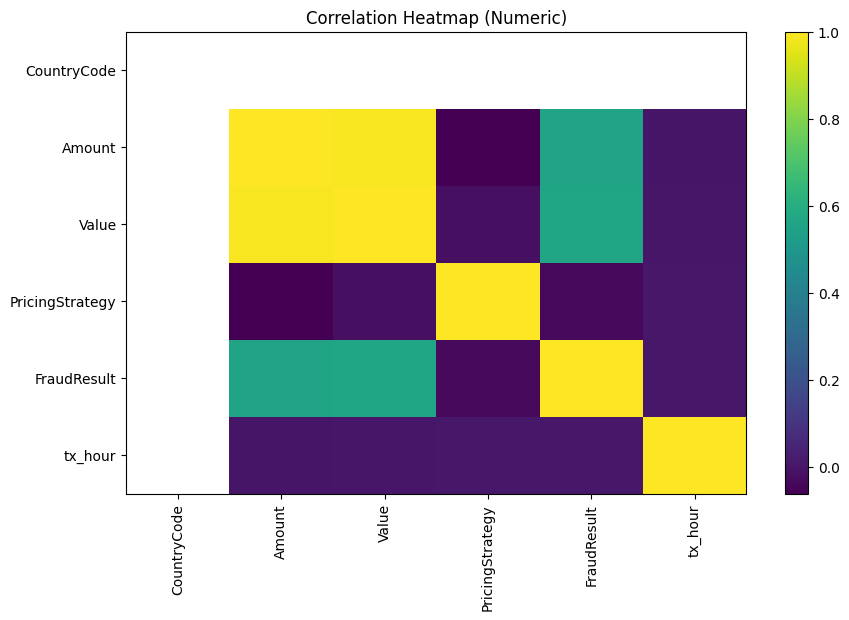

In [13]:
plt.figure(figsize=(10, 6))
plt.imshow(corr, aspect="auto")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap (Numeric)")
plt.colorbar()
plt.show()


## Top EDA Insights (Task 2)

1. **Data completeness:** There are **no missing values** in any of the 16 columns (missing ratio table is empty).  
   **Implication:** We can focus on feature engineering and modeling without an imputation step for this dataset (but still keep checks in pipelines for robustness).

2. **Extreme skew and outliers in transaction amounts:** `Amount` and `Value` have **very large standard deviations (~123k)** relative to their medians (**median Amount = 1000, median Value = 1000**) and include extreme values (Amount ranges from **-1,000,000 to 9,880,000**).  
   **Implication:** We should consider **log transforms, clipping/winsorization, or robust scaling** and carefully treat negative `Amount` values (credits vs debits).

3. **Low feature variability in location/currency:** `CountryCode` is constant (**256 for all rows**) and `CurrencyCode` is constant (**UGX for all rows**).  
   **Implication:** These fields add no predictive signal (as-is) and can be dropped or ignored during modeling.

4. **Strong category concentration:** Transactions are dominated by two `ProductCategory` values: **financial_services (45,405)** and **airtime (45,027)**, with the rest far smaller. `ProviderId` is also concentrated (e.g., **ProviderId_4 = 38,189** and **ProviderId_6 = 34,186**).  
   **Implication:** Categorical encoding must handle **imbalance**; rare categories may need grouping to reduce noise.

5. **Clear time patterns and seasonality:** Transactions cluster heavily during daytime hours (peaks around **16–18h**) and Fridays have the highest activity (**27,716**). Volume is highest in **Dec 2018 (35,635)** and **Jan 2019 (31,783)**.  
   **Implication:** Time-derived features (hour, day-of-week, month) are likely useful predictors for behavior-based risk modeling.
